In [19]:
pip install highlight-text

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

C:\Users\Legion\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [53]:
import matplotlib.pyplot as plt
import mplsoccer
import highlight_text
from mplsoccer import Bumpy


from PIL import Image
from io import BytesIO
import requests

In [3]:
df = pd.read_csv("La Liga.csv")

In [4]:
df

,Team,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,...,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31,Week 32,Week 33,Week 34
0,Alaves,14,18,19,20,17,19,15,15,15,...,18,19,18,19,20,19,19,18,16,16
1,Athletic Club,16,19,14,15,19,14,16,13,14,...,10,8,11,9,10,11,9,9,10,9
2,Atletico Madrid,4,4,2,5,5,4,3,2,1,...,1,1,1,1,1,1,1,1,1,1
3,Barcelona,1,1,1,1,1,1,5,6,5,...,2,2,2,2,2,3,3,3,3,3
4,Cadiz,18,11,15,10,10,8,7,7,7,...,15,14,14,15,13,12,13,13,13,12
5,Celta Vigo,12,7,8,12,13,17,17,18,18,...,11,9,10,11,8,10,11,11,11,10
6,Eibar,13,14,18,19,14,16,13,16,16,...,16,18,19,18,19,20,20,20,20,20
7,Elche,20,20,20,17,18,13,11,12,12,...,19,17,17,17,17,18,18,16,17,19
8,Getafe,19,12,11,7,11,9,10,9,11,...,13,15,15,14,15,15,15,15,15,15
9,Granada,6,2,6,4,4,3,2,4,6,...,8,10,8,8,9,8,8,8,8,8


In [5]:
dfT = df.T

In [6]:
dfT.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Team,Alaves,Athletic Club,Atletico Madrid,Barcelona,Cadiz,Celta Vigo,Eibar,Elche,Getafe,Granada,Huesca,Levante,Osasuna,Real Betis,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal
Week 1,14,16,4,1,18,12,13,20,19,6,11,15,5,7,3,8,17,2,10,9
Week 2,18,19,4,1,11,7,14,20,12,2,17,15,9,3,5,13,10,8,16,6
Week 3,19,14,2,1,15,8,18,20,11,6,17,10,13,5,3,7,4,9,16,12
Week 4,20,15,5,1,10,12,19,17,7,4,14,13,16,9,2,11,3,6,18,8


In [7]:
dfT.columns = dfT.iloc[0]

In [8]:
dfT = dfT.iloc[1:]

In [9]:
dfT

Team,Alaves,Athletic Club,Atletico Madrid,Barcelona,Cadiz,Celta Vigo,Eibar,Elche,Getafe,Granada,Huesca,Levante,Osasuna,Real Betis,Real Madrid,Real Sociedad,Sevilla,Valencia,Valladolid,Villarreal
Week 1,14,16,4,1,18,12,13,20,19,6,11,15,5,7,3,8,17,2,10,9
Week 2,18,19,4,1,11,7,14,20,12,2,17,15,9,3,5,13,10,8,16,6
Week 3,19,14,2,1,15,8,18,20,11,6,17,10,13,5,3,7,4,9,16,12
Week 4,20,15,5,1,10,12,19,17,7,4,14,13,16,9,2,11,3,6,18,8
Week 5,17,19,5,1,10,13,14,18,11,4,15,16,12,6,2,7,3,9,20,8
Week 6,19,14,4,1,8,17,16,13,9,3,15,18,12,10,2,5,7,11,20,6
Week 7,15,16,3,5,7,17,13,11,10,2,19,18,9,12,1,4,8,14,20,6
Week 8,15,13,2,6,7,18,16,12,9,4,19,17,11,8,1,3,10,14,20,5
Week 9,15,14,1,5,7,18,16,12,11,6,20,17,13,9,3,2,8,10,19,4
Week 10,15,10,1,5,8,20,16,12,11,6,19,18,14,13,3,2,7,9,17,4


In [10]:
week = ["Week " + str(num) for num in range(1,35)]

In [11]:
week

['Week 1',
 'Week 2',
 'Week 3',
 'Week 4',
 'Week 5',
 'Week 6',
 'Week 7',
 'Week 8',
 'Week 9',
 'Week 10',
 'Week 11',
 'Week 12',
 'Week 13',
 'Week 14',
 'Week 15',
 'Week 16',
 'Week 17',
 'Week 18',
 'Week 19',
 'Week 20',
 'Week 21',
 'Week 22',
 'Week 23',
 'Week 24',
 'Week 25',
 'Week 26',
 'Week 27',
 'Week 28',
 'Week 29',
 'Week 30',
 'Week 31',
 'Week 32',
 'Week 33',
 'Week 34']

In [24]:
highlight_dict = {
    "Atletico Madrid" : "#CB3524",
    "Real Madrid" : "white",
    "Barcelona" : "#EDBB00",
    "Sevilla" : "blue",
    'Real Sociedad':"purple",
    'Real Betis' : "#FF00FF",
    'Villarreal':'#008000',
    'Celta Vigo': "#800000",
    'Granada' : "#7FFFD4",
    "Athletic Club" : "#FFA500",
    "Osasuna" : "#FFC0CB",
    "Cadiz" : "#98AFC7",
    "Valencia":"#00FEEB",
    "Levante":"#E3FE00",
    "Getafe":"#FE0051",
    "Alaves":"#4FFF33",
    "Elche" : "#3368FF",
    "Huesca":"#33FFB8",
    "Valladolid":"#D1FF33",
    "Eibar":"#3CFF33"
}

In [25]:
bumpy = Bumpy(
      scatter_color = '#282828', line_color = '#252525',
    rotate_xticks=90,
    ticklabel_size=15,
    scatter_primary='D',
    show_right=True,
    plot_labels=True,
    alignment_yvalue=.1,
    alignment_xvalue=.065
)

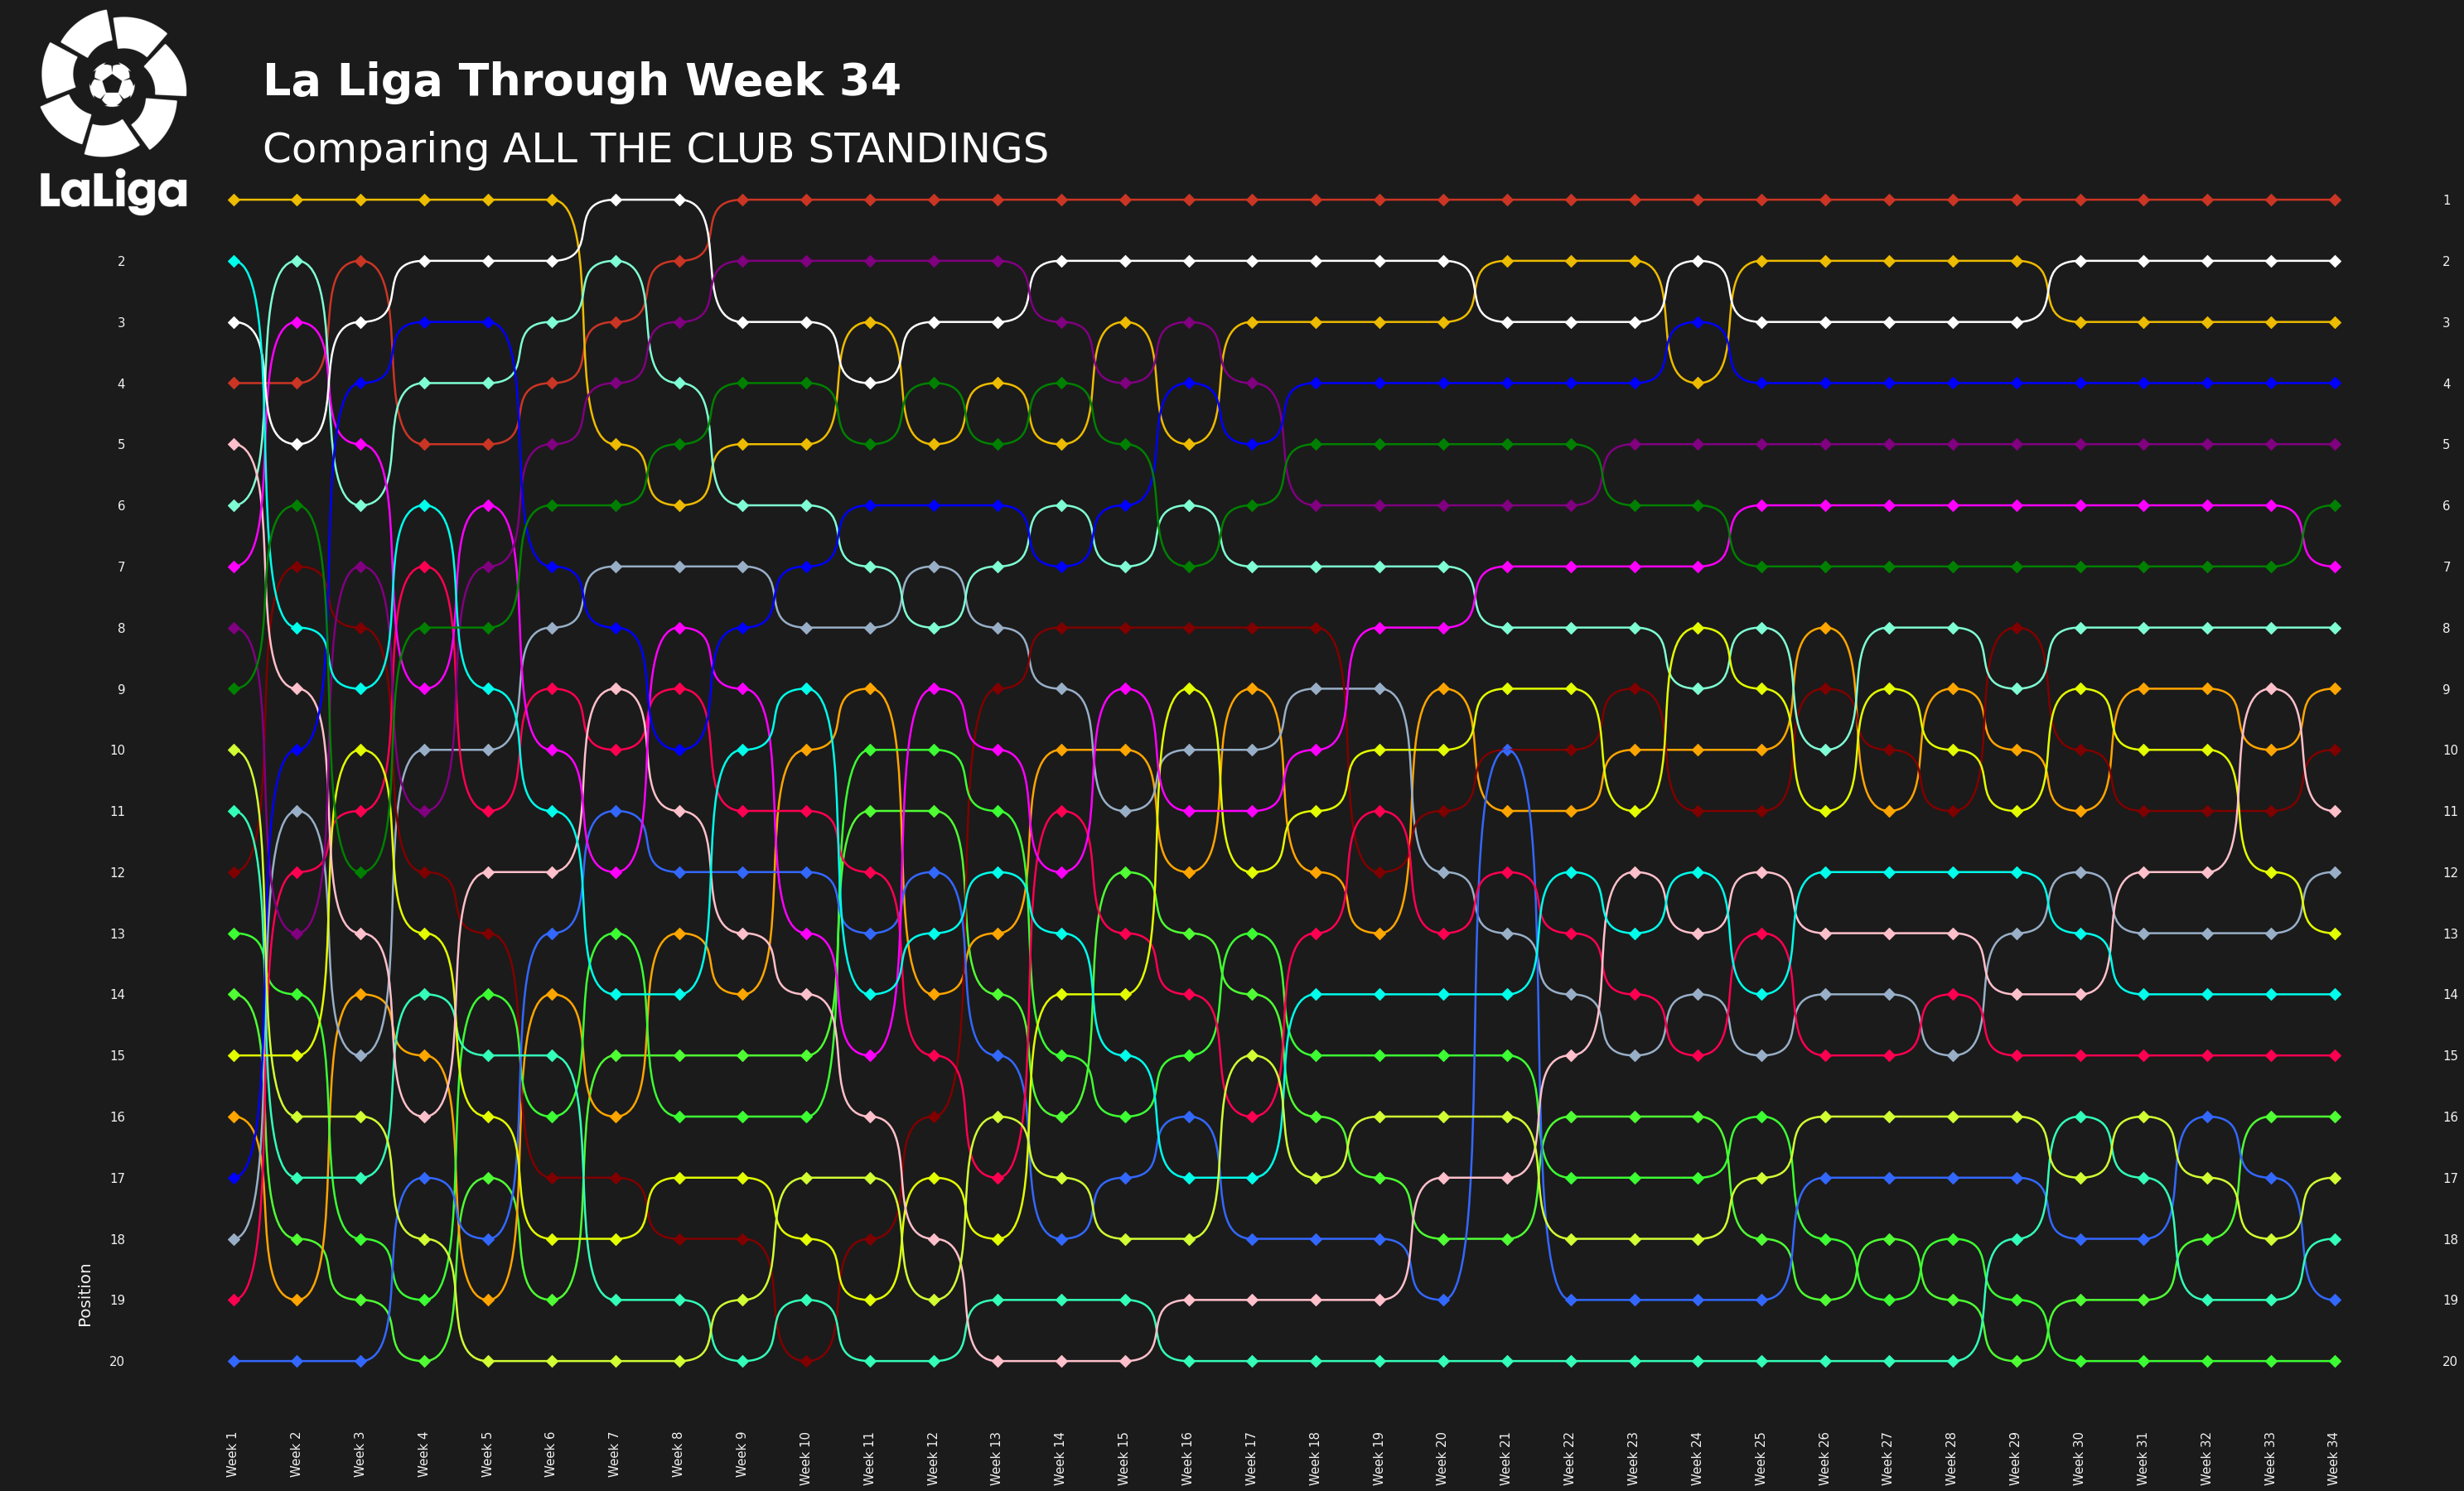

In [57]:
fig,ax = bumpy.plot(
   x_list = week,
    y_list = np.linspace(1,20,20).astype(int),
    values = dfT,
    secondary_alpha = .5,
    highlight_dict = highlight_dict,
    figsize = (50,30),
    y_label = 'Position',
    ylim = (-.1,22),
    lw = 2.5
)
fig.text(s = 'La Liga Through Week 34',x = .17,y=.87,c = 'white',size= 54,weight = 'bold')
highlight_text.fig_text(x = .17,y=.85,
                       s = 'Comparing <ALL THE CLUB STANDINGS>',c = 'white', fontsize = 50)


ax2 = fig.add_axes([.06,.8,.12,.12])
ax2.axis("off")
img = Image.open('laliga1.png')
ax2.imshow(img)


In [63]:
pd.DataFrame(highlight_dict.values(),index=None)

,0
0,#CB3524
1,white
2,#EDBB00
3,blue
4,purple
5,#FF00FF
6,#008000
7,#800000
8,#7FFFD4
9,#FFA500
